In [1]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# define filenames and their directories

directory = '../../../../Documents/ModellingData'



AMOC variables:
- 'amoc_amo_lag_cor'
- 'amoc_mean_ann'
- 'amoc_pattern_ann'
- 'amoc_spectra_ann'
- 'amoc_sst_regression_ann'
- 'amoc_stddev_ann'
- 'amoc_tas_regression_ann'
- 'amoc_timeseries_ann'

LIG models:
- CESM2 -> a1 = lig127k, b1 = piControl
- FGOALS-f3-L -> a2 = lig127k, b2 = piControl --> piControl run has no AMOC: Chris said to use parts of historical run as proxy
- GISS-E2-1-G -> a3 = lig127k, b3 = piControl
- IPSL-CM6A-LR -> a4 = lig127k, b4 = piControl

In [17]:
# CESM2 LIG -> a1

filename_a1 = '%s/CESM2_lig127k.cvdp_data.1-700.nc'%directory

# load files via xarray

expt_a1_file = xr.open_dataset(filename_a1,decode_times=False)

lat_a1 = expt_a1_file['lat']
lat_amoc_a1 = expt_a1_file['lat_amoc']
lon_a1 = expt_a1_file['lon']
depth_a1 = expt_a1_file['lev']
time_a1 = expt_a1_file['time']
frequency_a1 = expt_a1_file['frequency2']

amoc_spectra_ann_a1 = expt_a1_file['amoc_spectra_ann']


In [16]:
# CESM piControl -> b1

filename_b1 = '%s/CESM2_piControl.cvdp_data.701-1200.nc'%directory

# load files via xarray

expt_b1_file = xr.open_dataset(filename_b1,decode_times=False)

lat_b1 = expt_b1_file['lat']
lat_amoc_b1 = expt_b1_file['lat_amoc']
lon_b1 = expt_b1_file['lon']
depth_b1 = expt_b1_file['lev']
time_b1 = expt_b1_file['time']
frequency_b1 = expt_b1_file['frequency2']

amoc_spectra_ann_b1 = expt_b1_file['amoc_spectra_ann']


In [15]:
# FGOALS-f3-L LIG -> a2

filename_a2 = '%s/FGOALS-f3-L_lig127k.cvdp_data.700-1199.nc'%directory

# load files via xarray

expt_a2_file = xr.open_dataset(filename_a2,decode_times=False)

lat_a2 = expt_a2_file['lat']
lat_amoc_a2 = expt_a2_file['lat_amoc']
lon_a2 = expt_a2_file['lon']
depth_a2 = expt_a2_file['lev']
time_a2 = expt_a2_file['time']
frequency_a2 = expt_a2_file['frequency2']

amoc_spectra_ann_a2 = expt_a2_file['amoc_spectra_ann']


In [14]:
# GISS-E2-1-G LIG -> a3

filename_a3 = '%s/GISS-E2-1-G_lig127k.cvdp_data.2900-2999.nc'%directory

# load files via xarray

expt_a3_file = xr.open_dataset(filename_a3,decode_times=False)

lat_a3 = expt_a3_file['lat']
lat_amoc_a3 = expt_a3_file['lat_amoc']
lon_a3 = expt_a3_file['lon']
depth_a3 = expt_a3_file['lev']
time_a3 = expt_a3_file['time']
frequency_a3 = expt_a3_file['frequency2']

amoc_spectra_ann_a3 = expt_a3_file['amoc_spectra_ann']


In [13]:
# GISS-E2-1-G piControl -> b3

filename_b3 = '%s/GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'%directory

# load files via xarray

expt_b3_file = xr.open_dataset(filename_b3,decode_times=False)

lat_b3 = expt_b3_file['lat']
lat_amoc_b3 = expt_b3_file['lat_amoc']
lon_b3 = expt_b3_file['lon']
depth_b3 = expt_b3_file['lev']
time_b3 = expt_b3_file['time']
frequency_b3 = expt_b3_file['frequency2']

amoc_spectra_ann_b3 = expt_b3_file['amoc_spectra_ann']


In [12]:
# IPSL-CM6A-LR LIG -> a4

filename_a4 = '%s/IPSL-CM6A-LR_lig127k.cvdp_data.1850-2399.nc'%directory

# load files via xarray

expt_a4_file = xr.open_dataset(filename_a4,decode_times=False)

lat_a4 = expt_a4_file['lat']
lat_amoc_a4 = expt_a4_file['lat_amoc']
lon_a4 = expt_a4_file['lon']
depth_a4 = expt_a4_file['lev']
time_a4 = expt_a4_file['time']
frequency_a4 = expt_a4_file['frequency2']

amoc_spectra_ann_a4 = expt_a4_file['amoc_spectra_ann']


In [11]:
# IPSL-CM6A-LR piControl -> b4

filename_b4 = '%s/IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'%directory

# load files via xarray

expt_b4_file = xr.open_dataset(filename_b4,decode_times=False)

lat_b4 = expt_b4_file['lat']
lat_amoc_b4 = expt_b4_file['lat_amoc']
lon_b4 = expt_b4_file['lon']
depth_b4 = expt_b4_file['lev']
time_b4 = expt_b4_file['time']
frequency_b4 = expt_b4_file['frequency2']

amoc_spectra_ann_b4 = expt_b4_file['amoc_spectra_ann']


ValueError: x and y must have same first dimension, but have shapes (350,) and (4, 350)

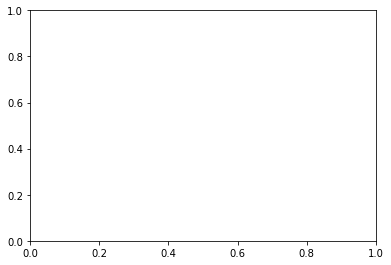

In [19]:
spectrum = plt.figure()
axes = spectrum.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(frequency_a1, amoc_spectra_ann_a1)

In [20]:
print(frequency_a1)

<xarray.DataArray 'frequency2' (frequency2: 350)>
array([0.001429, 0.002857, 0.004286, ..., 0.497143, 0.498571, 0.5     ],
      dtype=float32)
Coordinates:
  * frequency2  (frequency2) float32 0.0014285714 0.0028571428 ... 0.5
Attributes:
    long_name:  power spectra frequency
    units:      1


In [22]:
amoc_spectra_ann_a1

<xarray.DataArray 'amoc_spectra_ann' (ncurves: 4, frequency2: 350)>
array([[4.033696, 3.383869, 3.079259, ..., 0.376709, 0.448621, 0.528472],
       [2.412383, 2.411791, 2.410806, ..., 0.476854, 0.47683 , 0.476823],
       [4.194293, 4.193264, 4.191552, ..., 0.829082, 0.829042, 0.829029],
       [5.214425, 5.213146, 5.211017, ..., 1.030731, 1.030681, 1.030664]],
      dtype=float32)
Coordinates:
  * frequency2  (frequency2) float32 0.0014285714 0.0028571428 ... 0.5
  * ncurves     (ncurves) int32 0 1 2 3
Attributes:
    units_info:  df refers to frequency interval; data are standardized so th...
    units:       1/df
    info:        (0,:)=spectrum,(1,:)=Markov red noise spectrum, (2,:)=0.95% ...
    long_name:   AMOC (monthly) power spectra, Markov spectrum and confidence...

In [25]:
amoc_spectra_ann_a1_tp = amoc_spectra_ann_a1.transpose("frequency2", "ncurves")
amoc_spectra_ann_b1_tp = amoc_spectra_ann_b1.transpose("frequency2", "ncurves")
amoc_spectra_ann_a2_tp = amoc_spectra_ann_a2.transpose("frequency2", "ncurves")
amoc_spectra_ann_a3_tp = amoc_spectra_ann_a3.transpose("frequency2", "ncurves")
amoc_spectra_ann_b3_tp = amoc_spectra_ann_b3.transpose("frequency2", "ncurves")
amoc_spectra_ann_a4_tp = amoc_spectra_ann_a4.transpose("frequency2", "ncurves")
amoc_spectra_ann_b4_tp = amoc_spectra_ann_b4.transpose("frequency2", "ncurves")

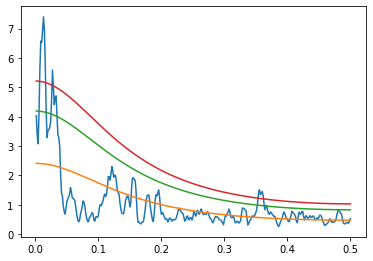

In [24]:
spectrum = plt.figure()
axes = spectrum.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(frequency_a1, amoc_spectra_ann_a1_tp)

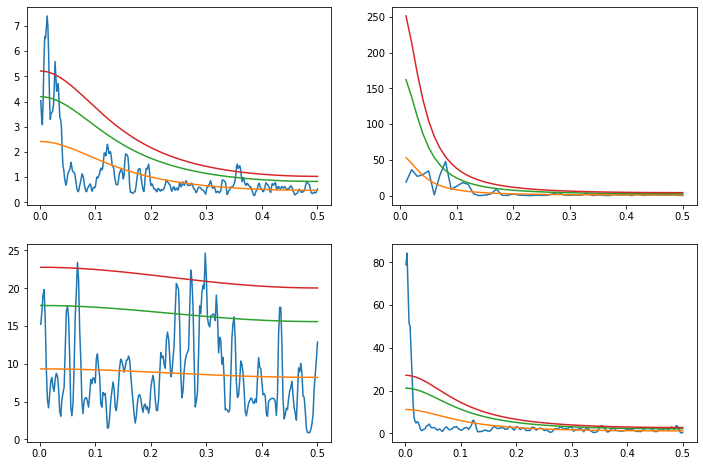

In [27]:
fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax1.plot(frequency_a1, amoc_spectra_ann_a1_tp)
ax2.plot(frequency_a2, amoc_spectra_ann_a2_tp)
ax3.plot(frequency_a3, amoc_spectra_ann_a3_tp)
ax4.plot(frequency_a4, amoc_spectra_ann_a4_tp)


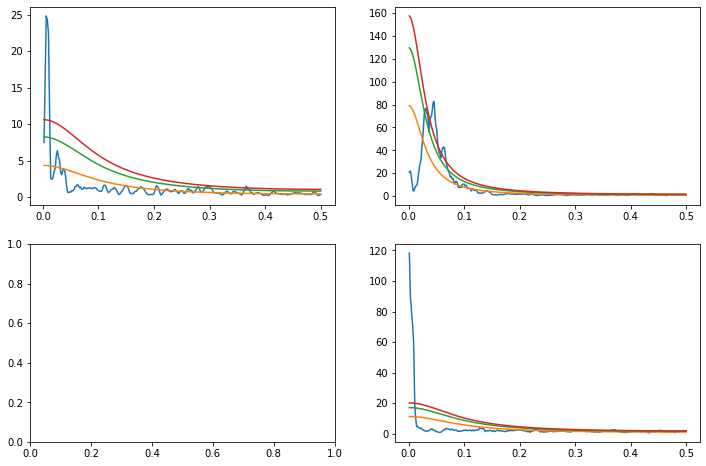

In [28]:
fig = plt.figure(figsize = (12, 8))
gs = mpl.gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax1.plot(frequency_b1, amoc_spectra_ann_b1_tp)
#ax2.plot(frequency_b2, amoc_spectra_ann_b2_tp)
ax3.plot(frequency_b3, amoc_spectra_ann_b3_tp)
ax4.plot(frequency_b4, amoc_spectra_ann_b4_tp)
